# Importing common libraries

In [1]:
import pandas as pd
import seaborn as sns

# DF1 - Earning/ Hours worked in Construction in Ireland

In [2]:
##JSON file format

!conda install pyjstat

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - pyjstat

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [3]:
#from pyjstat import pyjstat

#request_url = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BDA01/JSON-stat/2.0/en'
# read json data
dataset = pyjstat.Dataset.read(request_url)

# write to pandas dataframe
#df1 = dataset.write('dataframe')

Generic exception: Traceback (most recent call last):
  File "/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py", line 386, in _make_request
    self._validate_conn(conn)
  File "/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py", line 1042, in _validate_conn
    conn.connect()
  File "/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/urllib3/connection.py", line 414, in connect
    self.sock = ssl_wrap_socket(
  File "/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/urllib3/util/ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/urllib3/util/ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostn

SSLError: HTTPSConnectionPool(host='ws.cso.ie', port=443): Max retries exceeded with url: /public/api.restful/PxStat.Data.Cube_API.ReadDataset/BDA01/JSON-stat/2.0/en (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)')))

In [4]:
##Alternative way to the above code, revisit to ensure best option has been chosen.

from pyjstat import pyjstat

request_url = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.PxAPIv1/en/27/EHWC/BDA01?query=%7B%22query%22:%5B%7B%22code%22:%22STATISTIC%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%22BDA01C3%22%5D%7D%7D%5D,%22response%22:%7B%22format%22:%22json-stat2%22,%22pivot%22:null%7D%7D'
df = pd.read_json
# read json data
dataset = pyjstat.Dataset.read(request_url)

# write to pandas dataframe
df1 = dataset.write('dataframe')

In [5]:
df1.head()

,Type of Worker,Year,Statistic,value
0,All manual employee grades,1969,Average Hours Worked per Week in the Building ...,NaN
1,All manual employee grades,1970,Average Hours Worked per Week in the Building ...,NaN
2,All manual employee grades,1971,Average Hours Worked per Week in the Building ...,NaN
3,All manual employee grades,1972,Average Hours Worked per Week in the Building ...,NaN
4,All manual employee grades,1973,Average Hours Worked per Week in the Building ...,NaN


In [6]:
#To determine the variables in the statistic column.

df1label = df1.groupby(by=['Statistic']).size()
print(df1label)

Statistic
Average Hours Worked per Week in the Building and Construction Industry    360
dtype: int64


In [7]:
##Dropping the Average weekly earning rows from the dataframe as it already contains hours worked and hourly rate.

df1C = df1.drop(df1[df1["Statistic"]=="Average Earnings per Week in the Building and Construction Industry"].index)
print(df1C)

                              Type of Worker  Year  \
0                 All manual employee grades  1969   
1                 All manual employee grades  1970   
2                 All manual employee grades  1971   
3                 All manual employee grades  1972   
4                 All manual employee grades  1973   
..                                       ...   ...   
355  All employees (clerical and operatives)  2004   
356  All employees (clerical and operatives)  2005   
357  All employees (clerical and operatives)  2006   
358  All employees (clerical and operatives)  2007   
359  All employees (clerical and operatives)  2008   

                                             Statistic  value  
0    Average Hours Worked per Week in the Building ...    NaN  
1    Average Hours Worked per Week in the Building ...    NaN  
2    Average Hours Worked per Week in the Building ...    NaN  
3    Average Hours Worked per Week in the Building ...    NaN  
4    Average Hours Worked per W

In [8]:
df1C.dtypes

Type of Worker     object
Year               object
Statistic          object
value             float64
dtype: object

In [9]:
#Count the number of null values.

df1null = df1C.isnull().sum()

In [10]:
df1null

Type of Worker      0
Year                0
Statistic           0
value             119
dtype: int64

In [11]:
!conda config --add channels conda-forge
!conda install -c conda-forge missingno

#ref- https://towardsdatascience.com/visualizing-missing-values-in-python-is-shockingly-easy-56ed5bc2e7ea

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



# All requested packages already installed.



In [12]:
import missingno as msno

<AxesSubplot:>

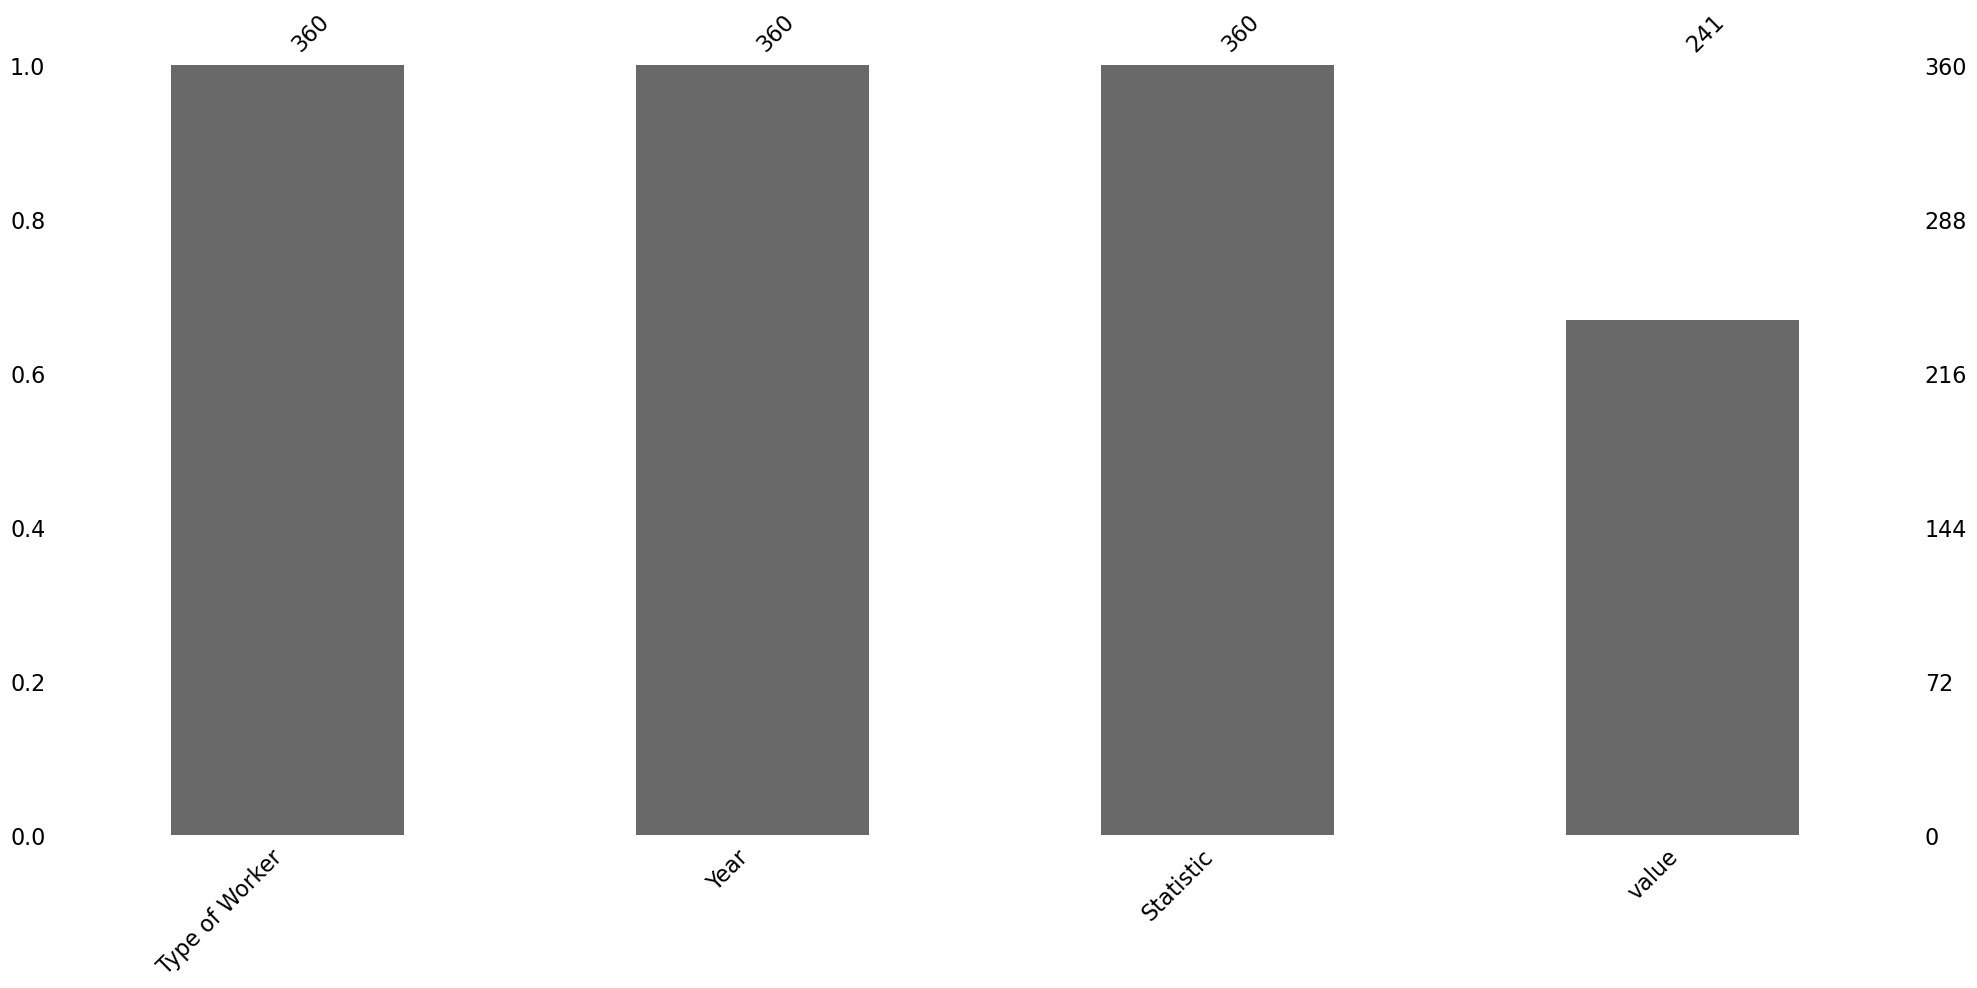

In [13]:
#To visualise missing values.All missing values are in the value column

msno.bar(df1C)

<AxesSubplot:>

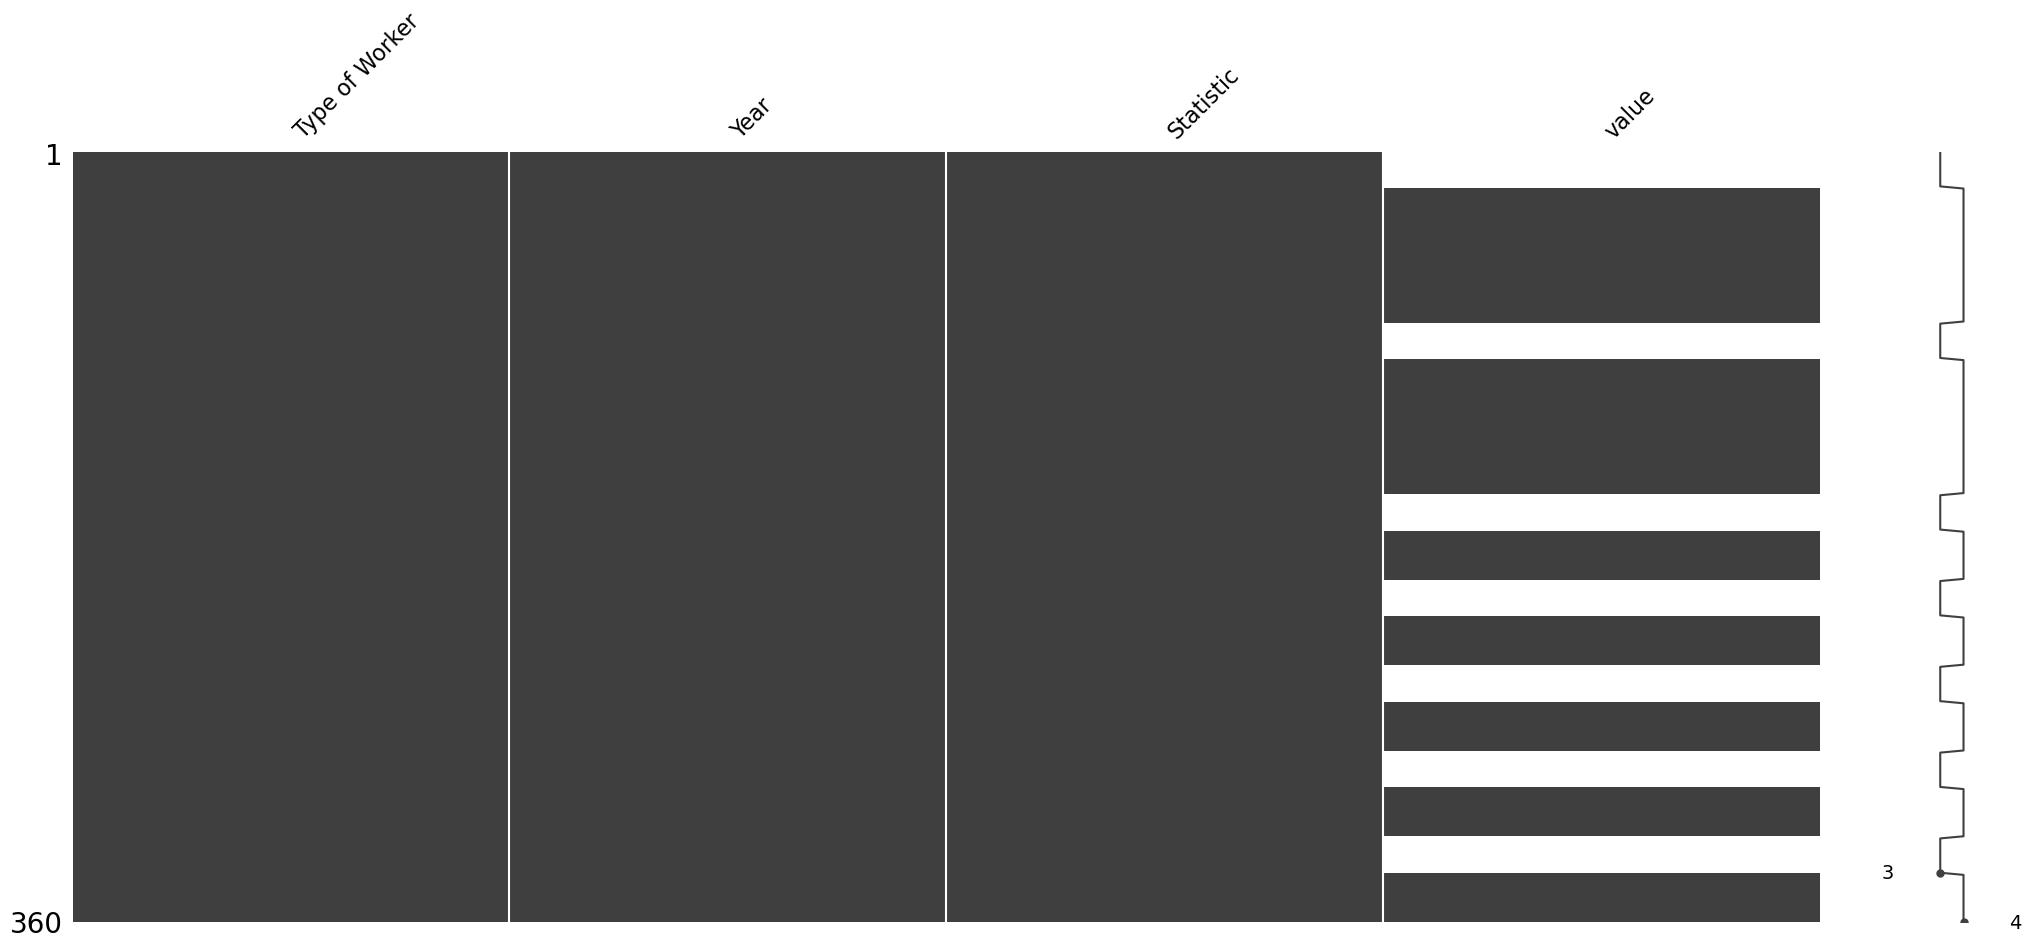

In [14]:
## Can see there is no pattern to the missing data.

msno.matrix(df1C)

In [15]:
#There are a number of null columns. Drop these columns. 

df1C.dropna(inplace=True)

In [16]:
df1null = df1C.isnull().sum()
df1null

Type of Worker    0
Year              0
Statistic         0
value             0
dtype: int64

In [17]:
#Dropping the first 50 rows as they are all 'NaN'

df1 = df1.drop(index=df1.index[:51]).reset_index(drop=True)

In [18]:
df1.head()

,Type of Worker,Year,Statistic,value
0,Skilled operatives,1980,Average Hours Worked per Week in the Building ...,45.7
1,Skilled operatives,1981,Average Hours Worked per Week in the Building ...,44.2
2,Skilled operatives,1982,Average Hours Worked per Week in the Building ...,44.2
3,Skilled operatives,1983,Average Hours Worked per Week in the Building ...,43.3
4,Skilled operatives,1984,Average Hours Worked per Week in the Building ...,43.4


In [ ]:
df1.dtypes

In [ ]:
df1null = df1.isnull().sum()

In [ ]:
df1null

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.describe

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Statistic", y="Year", data=df1)

In [ ]:
# Generate a bar plot 
g = sns.catplot('Statistic Label', data=df1, kind="count", aspect=1.5);
g.set(title='Count of medals awarded in each of the top sports');

In [ ]:
#reverts to the tab - file is .tsv#
#The pipe (|) allows multiple seperators 
#\t seperating tabs and ',' seperating commas as are in the column 1 

df2=pd.read_csv("Production_Europe.tsv",sep="\t|,", engine='python')

#### Default parser for read csv does not support seperators greater than one character. Specifying engine=python above so multiple seperators can be used. Required as file as file contains tab and comma delimiters.  

In [ ]:
df2.head()

In [ ]:
df2=df2.drop(["indic_bt", "nace_r2", "s_adj"], axis=1)

In [ ]:
#Want to keep unit and geo\time columns the same. Melt the rest of the year columns

df2=pd.melt(df2, id_vars=["unit","geo\\time"], var_name="Year",
          value_name="Production")

In [ ]:
#Replacing everything that isn't a number 0 to 9, or a decimal point.
#Revisit.
df2['Production'] = df2['Production'].str.replace('[^0-9.]+', '', regex=True)

#Ref - https://copyprogramming.com/howto/python-pandas-how-to-remove-non-numeric-characters-from-multiple-columns

In [ ]:
df2.info()

In [ ]:
df2.astype("object").describe()

In [ ]:
df2.dtypes

In [ ]:
#When you melt a numerical column it turns to an object/string and you need to change back to integer. 

df2[["Year","Production"]]=df2[["Year","Production"]].apply(pd.to_numeric)

#Insert Geeks for Geeks ref.

In [ ]:
df2.dtypes

In [ ]:
import numpy as np

#Need to remove all white space to address the unavailable values.
df2 = df2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#Replace the ':' vale with NaN. 
df2 = df2.replace(':', np.nan)

#Ref - https://stackoverflow.com/questions/33788913/pythonic-efficient-way-to-strip-whitespace-from-every-pandas-data-frame-cell-tha

In [ ]:
df2

In [ ]:
ax = sns.histplot(df2.Production, kde=True)
ax.set(xlabel='Production', ylabel='Production', title ='Production Histogram')

In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2

In [ ]:
#Determine whether dropping the NaN values affects the distribution of the data

ax = sns.histplot(df2.Production)
ax.set(xlabel='Production', ylabel='Production', title ='Production Histogram')

In [ ]:
df3=pd.read_csv("national_house_construction_cost_index_0.csv")

In [ ]:
df3.head()

In [ ]:
#Setting the first row of the table to column 2.

df3=pd.read_csv("national_house_construction_cost_index_0.csv", header=2)

In [ ]:
df3.head()

In [ ]:
df3.dtypes

In [ ]:
df3_transposed = df3.set_index('Month').T

In [ ]:
df3_transposed

In [ ]:
df3_transposed=df3_transposed.drop(["2016"], axis=0)

In [ ]:
#After transposing the data, all data types show as objects.
#To converted to floats = 
#including the line 'errors=coerce' converts the non numeric values to NaN. 

for col in df3_transposed.columns[0:13]:
    df3_transposed[col] = pd.to_numeric(df3_transposed[col])

In [ ]:
df3_transposed.dtypes

In [ ]:
#Determine whether dropping the NaN values affects the distribution of the data

ax = sns.histplot(df3_transposed['Yearly average'])
ax.set(xlabel='Yearly Average', ylabel='Production', title ='Production Histogram')

In [ ]:
df5=pd.read_csv("download1061915290288055378.csv")

In [ ]:
df5

In [ ]:
df5.tail()

In [ ]:
df5 = df5.drop(["FeatureCode","Measurement","Units"], axis=1)

In [ ]:
df5.head()

In [ ]:
df5.dtypes

In [ ]:
df5.sort_values(by=["DateCode"], inplace=True)

In [ ]:
df5

In [ ]:
df6=pd.read_csv("BBA02.20230428105548.csv")

In [ ]:
df6.head()

In [ ]:
df7=pd.read_csv("Labourinput_Europe.tsv",sep="\t|,", engine='python')
#reverts to the tab - file is .tsv#

In [ ]:
df7.head()

In [ ]:
df7=df7.drop(["indic_bt", "nace_r2", "s_adj"], axis=1)

In [ ]:
df7.head()

In [ ]:
df7m=df7.melt(id_vars=["geo\\time", "unit"], 
        var_name="Year", 
        value_name="Labour Input")

In [ ]:
import numpy as np

#Need to remove all white space to address the unavailable values.
df7m= df7m.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#Replace the ':' vale with NaN. 
df7m = df7m.replace(':', np.nan)

#Ref - https://stackoverflow.com/questions/33788913/pythonic-efficient-way-to-strip-whitespace-from-every-pandas-data-frame-cell-tha

In [ ]:
df7m

In [ ]:
#Replacing everything that isn't a number 0 to 9, or a decimal point.
#Revisit.

df7m= df7m.apply(lambda x: x.str.replace('[^0-9.]+', '', regex=True) if x.dtype == "object" else x)

#Ref - https://copyprogramming.com/howto/python-pandas-how-to-remove-non-numeric-characters-from-multiple-columns

In [ ]:
import plotly.graph_objects as go

#fig = go.Figure(
    data=go.Choropleth(
        locations=df7m["geo\\time"],
        z=df7m["Labour Input"].astype(int),
        locationmode="World",
        colorscale='Blues',
        colorbar_title="Labour Input"
    )
)

#fig.update_layout(
#title_text="US Population across states",
geo_scope="world")

fig.show()

In [ ]:
df8=pd.read_csv("PriceIndex_BuildingConstruction_Materials_Ireland.csv")

In [ ]:
df8.tail()

In [ ]:
df8=df8.drop(["STATISTIC", "TLIST(A1)", "C01409V03262"], axis=1)

In [ ]:
df8

In [ ]:
# split the column by comma and create new columns for each variable
df8[['Price_Index', '%Change']] = df8['Statstic Label'].str.split(',', expand=True)

# drop the original column
df8.drop('Statistic Label', axis=1, inplace=True)

print(df8)

In [ ]:
sns.scatterplot(x=df8['Hour'], y=internet_dataframe['VALUE'], hue=df8['Type of Material'] )

In [ ]:
df9=pd.read_csv("Purchases_BuildingConstruction_New Basis_Ireland.csv")

In [ ]:
df9.head()

In [ ]:
df9.tail()

In [ ]:
df9.info()

In [ ]:
df9.describe(include="all")

In [ ]:
df9=df9.drop(["STATISTIC","C02407V02905", "C01989V02424", "Statistic Label", "TLIST(A1)"], axis=1)

In [ ]:
df9.head()

In [ ]:
#Global construction empoyment numbers in thousand persons.

df10 = pd.read_csv("Global_Con_Employment.csv")

In [ ]:
df10.head()

In [ ]:
## Indicator, subject and frequency contain the same values for all rows. 
##Flag codes column contains all NaNs so is of no value. Drop these rows.

df10=df10.drop(["INDICATOR","SUBJECT", "FREQUENCY", "Flag Codes"], axis=1)

In [ ]:
df10.head(20)

In [ ]:
#To look at the non numeric columns, include="all".
#This shows the unit of measure is the same for each row. There is 44 unique locations included.

df10.describe(include="all")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#heat map to see the correlation between different variables.

def feature_interactions(df10,feature1, feature2,continuous_col):
    group = df10.groupby([feature1,feature2],as_index=False)[continuous_col].mean().reset_index(drop=True)

    pivot = group.pivot(index=feature1, columns=feature2, values=continuous_col)
    pivot.fillna(0, inplace=True)
    plt.figure(figsize=(10,6)) #size of the plot.
    sns.heatmap(pivot,cmap='Greens')
    plt.show()

feature_interactions(df10,'LOCATION','TIME','Value')

In [ ]:
# Using seaborn to create a box plot.
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='TIME', y='Value', data=df10, ax=ax).set(title='Year vs Number of Construction Workers')

ax.set_ylabel('Number of Construction Workers')

# rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# specifying the y-axis limits
ax.set_ylim(0, 4500)

plt.show()

In [ ]:
mean = df10['Value'].mean()

print(mean)

In [ ]:
median = df10['Value'].median()

print(median)

mean > median therefore the data should be positively skewed when plotted.

In [ ]:
data = df10['Value']

sns.distplot(data, bins=10, hist=True, kde=True, label = 'No. of Construction Workers (Thousands)')

Can conclude the number of construction workers is positively skewed.
Ref - https://gist.github.com/pb111/512c840affb32593d28573fbb764045b